# Imports

In [15]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Carregar Dados

In [16]:
path = pathlib.Path.cwd().parent / "data" / "EMGDataset.csv"

df = pd.read_csv(path, header=None)
df.columns = ["corrugador_supercilio", "zigomatico_maior", "target"]
df.sample(5)

,corrugador_supercilio,zigomatico_maior,target
21511,240.0,368.0,4.0
48005,906.0,0.0,3.0
30973,3.0,3927.0,2.0
21360,2169.0,1395.0,5.0
589,2033.0,1427.0,5.0


# Gráfico de Dispersão

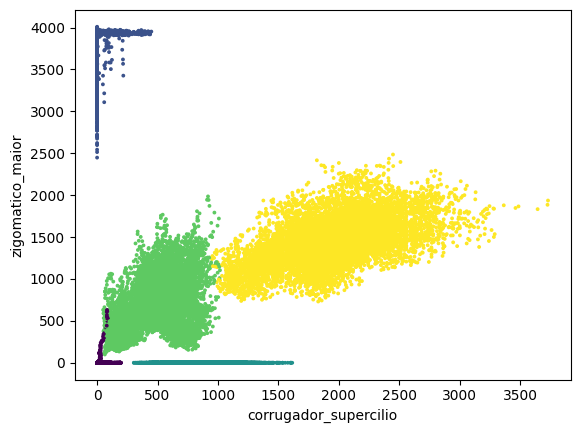

In [17]:
# Gráfico de dispersão das classes
plt.scatter(
    df["corrugador_supercilio"], df["zigomatico_maior"], c=df["target"], s=3
)
plt.xlabel("corrugador_supercilio")
plt.ylabel("zigomatico_maior")
plt.show()

- Adicionar análise sobre os dados

# Validação KFold

In [18]:
X = df[["corrugador_supercilio", "zigomatico_maior"]]
y = df["target"]

# Valores de K a serem testados
k_values = [1, 7, 11, 17, 23, 39, 101, 501, 1001]

# Número de folds para a validação cruzada
n_splits = 10

# Objeto KFold para dividir os dados
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Dicionário para armazenar a acurácia média de cada K
mean_accuracies = {}

# Loop para testar cada valor de K
for k in k_values:
    # Lista para armazenar as acurácias de cada fold para o K atual
    fold_accuracies = []

    # KFold gera os índices para treino e teste em cada iteração
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Criar e treinar o modelo K-NN
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Fazer a previsão e calcular a acurácia
        y_pred = knn.predict(X_test)
        acuracia = accuracy_score(y_test, y_pred)
        fold_accuracies.append(acuracia)

    # Calcular a acurácia média para o K atual
    mean_accuracies[k] = np.mean(fold_accuracies)

# Converter o dicionário de resultados em um DataFrame
df_accuracies = pd.DataFrame(
    list(mean_accuracies.items()), columns=["K", "Acurácia Média"]
)

# Definir a coluna 'K' como índice para melhor visualização
df_accuracies.set_index("K", inplace=True)

print("Acurácias médias por K:")
print(df_accuracies)

# Encontrar o K com a maior acurácia média
best_k = df_accuracies["Acurácia Média"].idxmax()
print(f"\nO melhor valor de K é: {best_k}")

Acurácias médias por K:
      Acurácia Média
K                   
1            0.99924
7            0.99904
11           0.99886
17           0.99878
23           0.99848
39           0.99824
101          0.99818
501          0.99790
1001         0.99670

O melhor valor de K é: 1


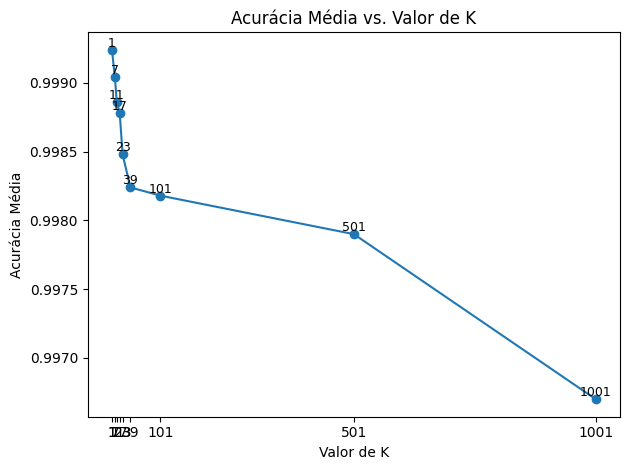

In [19]:
# Gráfico da acurácia média vs. valor de K
plt.plot(df_accuracies.index, df_accuracies["Acurácia Média"], marker="o")
plt.xlabel("Valor de K")
plt.ylabel("Acurácia Média")
plt.title("Acurácia Média vs. Valor de K")
plt.xticks(df_accuracies.index)
plt.tick_params(axis="x")

# Adicionar os valores de K nos pontos do gráfico
for x, y in zip(df_accuracies.index, df_accuracies["Acurácia Média"]):
    plt.text(x, y, str(x), ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

In [20]:
X = df[["corrugador_supercilio", "zigomatico_maior"]]
y = df["target"]

# Listas para armazenar as métricas de cada rodada
accuracies = []
confusion_matrices = []

# Variáveis para rastrear a matriz de confusão da melhor e pior acurácia
best_accuracy = None
worst_accuracy = None
best_conf_matrix = None
worst_conf_matrix = None

# Loop de 500 rodadas
for i in range(500):
    print(f"\rIteração {i + 1}/500", end="")

    # Separação dos dados em 80% treino e 20% teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=i, stratify=y
    )

    # Criar e treinar o modelo K-NN com o melhor K
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train, y_train)

    # Fazer a previsão
    y_pred = knn.predict(X_test)

    # Calcular a acurácia e a matriz de confusão
    acuracia = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Armazena a acurácia da rodada
    accuracies.append(acuracia)

    # Atualizar as matrizes de confusão da melhor e pior acurácia
    if best_accuracy is None or acuracia > best_accuracy:
        best_accuracy = acuracia
        best_conf_matrix = conf_matrix

    if worst_accuracy is None or acuracia < worst_accuracy:
        worst_accuracy = acuracia
        worst_conf_matrix = conf_matrix


Iteração 500/500

In [21]:
# Calcular as estatísticas finais
media_acuracia = np.mean(accuracies)
desvio_padrao_acuracia = np.std(accuracies)
maior_acuracia = np.max(accuracies)
menor_acuracia = np.min(accuracies)

# Imprimir os resultados em um formato de tabela
data = {
    "Média": [media_acuracia],
    "Desvio-Padrão": [desvio_padrao_acuracia],
    "Maior Valor": [maior_acuracia],
    "Menor Valor": [menor_acuracia],
}
tabela_acuracia = pd.DataFrame(data, index=["Acurácia"])

# Exibir a tabela de acurácia
tabela_acuracia

,Média,Desvio-Padrão,Maior Valor,Menor Valor
Acurácia,0.999177,0.000261,0.9998,0.9981


In [22]:
# Matriz de Confusão para a Melhor Acurácia
pd.DataFrame(best_conf_matrix)

,0,1,2,3,4
0,1999,0,0,1,0
1,0,2000,0,0,0
2,0,0,2000,0,0
3,0,0,0,1999,1
4,0,0,0,0,2000


In [23]:
# Matriz de Confusão para a Pior Acurácia
pd.DataFrame(worst_conf_matrix)

,0,1,2,3,4
0,1994,0,0,6,0
1,0,2000,0,0,0
2,0,0,2000,0,0
3,8,0,0,1989,3
4,0,0,0,2,1998
